In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


file_path = '/cis/home/tchen94/my_documents/congressional-twin/experiments/tianyi/cmds_dict_twin_test.p'

with open(file_path, 'rb') as file:
    cmds = pickle.load(file)
    

RAG_generated=cmds['generated']
real=cmds['real']


In [2]:
real.shape

(100, 10)

In [117]:
from scipy.spatial import procrustes
new_RAG_generated, new_real, test_stats= procrustes(RAG_generated, real)

print(test_stats)


L2=[]
Btimes=5000

for i in range(Btimes):
    real_permuted = np.random.permutation(real)
    new_lora, new_avg_pre, dis= procrustes(RAG_generated, real_permuted)
    L2.append(dis)

p_value=sum(L2<test_stats)/Btimes


# Plot the histograms
#plt.axvline(x=test_stats_pre_2024, color='black',c='k', label=f'T={test_stats_pre_2024:1.2f}; $p$<{1/Btimes:1.2f} (<2024)')
#plt.axvline(x=test_stats_post_2024, color='black',c='k', linestyle='--',label=f'T={test_stats_post_2024: 1.2f}; $p$<{1/Btimes:1.2f} ($\geq$2024)')

plt.axvline(x=test_stats, color='black',c='k', label=f'T={test_stats:1.2f}; p={p_value:1.2f}')

plt.hist(L2, bins=300, color='blue', alpha=0.25, label='Null distribution',density=True)


ax = plt.gca()
ax.legend(ncol=2, loc='upper left', columnspacing=0.1)
ax.set_ylabel("normalized density", fontsize=16)
ax.set_xlabel('$L_2$ distance after Procrustes', fontsize=16)
# Show the figure
plt.show()

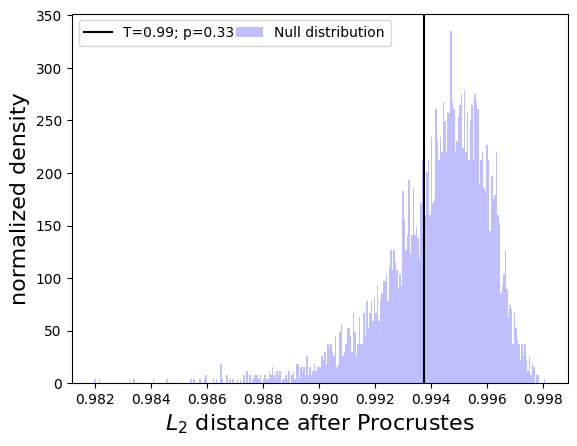